In [1]:
import pandas as pd
import re

C:\Users\erens\AppData\Local\Temp\ipykernel_3800\581249992.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df =  pd.read_csv("results.csv")

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.isna().sum()  ## df.isna().sum() ifadesinin çıktısı, df veri çerçevesindeki her bir sütundaki eksik değerlerin toplam sayısını içerir.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [7]:
df.sort_values("date").tail() ##veri çerçevesindeki tarihe göre sıralanmış satırların en son beş gözlemini görüntüler.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
46284,2024-02-07,Ivory Coast,DR Congo,1,0,African Cup of Nations,Ebimpé,Ivory Coast,False
46285,2024-02-07,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
46287,2024-02-10,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True
46286,2024-02-10,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
46288,2024-02-11,Ivory Coast,Nigeria,2,1,African Cup of Nations,Ebimpé,Ivory Coast,False


In [8]:
df = df[(df["date"] >= "2021-07-11")].reset_index(drop=True) ##son EURO başlangıcı

In [9]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
2622,2024-02-07,Ivory Coast,DR Congo,1,0,African Cup of Nations,Ebimpé,Ivory Coast,False
2623,2024-02-07,Nigeria,South Africa,1,1,African Cup of Nations,Bouaké,Ivory Coast,True
2625,2024-02-10,South Africa,DR Congo,0,0,African Cup of Nations,Abidjan,Ivory Coast,True
2624,2024-02-10,Qatar,Jordan,3,1,AFC Asian Cup,Lusail,Qatar,False
2626,2024-02-11,Ivory Coast,Nigeria,2,1,African Cup of Nations,Ebimpé,Ivory Coast,False


In [10]:
df.home_team.value_counts()

home_team
Mexico           36
United States    35
Qatar            33
Bahrain          32
Morocco          29
                 ..
Chameria          1
Aymara            1
Elba Island       1
Ticino            1
Tibet             1
Name: count, Length: 242, dtype: int64

In [11]:
rank = pd.read_csv("fifa_ranking-2023-07-20.csv")

In [12]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2021-07-11")].reset_index(drop=True)

In [13]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

C:\Users\erens\AppData\Local\Temp\ipykernel_3800\1689758223.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()


In [14]:
df_euro_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_euro_ranked = df_euro_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [15]:
df_euro_ranked[(df_euro_ranked.home_team == "Germany") | (df_euro_ranked.away_team == "Germany")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
1072,2022-09-26,England,Germany,3,3,UEFA Nations League,London,England,False,1737.46,1737.46,5.0,0.0,1658.96,1658.96,11.0,0.0
1141,2022-11-16,Oman,Germany,0,1,Friendly,Muscat,Oman,False,1320.29,1323.03,75.0,0.0,1650.21,1658.96,11.0,0.0
1205,2022-11-23,Germany,Japan,1,2,FIFA World Cup,Al Rayyan,Qatar,True,1650.21,1658.96,11.0,0.0,1559.54,1554.69,24.0,0.0
1219,2022-11-27,Spain,Germany,1,1,FIFA World Cup,Al Khor,Qatar,True,1715.22,1716.93,7.0,1.0,1650.21,1658.96,11.0,0.0
1233,2022-12-01,Costa Rica,Germany,2,4,FIFA World Cup,Al Khor,Qatar,True,1503.59,1500.06,31.0,-3.0,1650.21,1658.96,11.0,0.0
1348,2023-03-25,Germany,Peru,2,0,Friendly,Mainz,Germany,False,1646.91,1650.21,14.0,3.0,1564.30,1561.01,21.0,-2.0
1404,2023-03-28,Germany,Belgium,2,3,Friendly,Cologne,Germany,False,1646.91,1650.21,14.0,3.0,1781.30,1816.71,4.0,2.0
1443,2023-06-12,Germany,Ukraine,3,3,Friendly,Bremen,Germany,False,1647.42,1646.91,14.0,0.0,1530.04,1536.99,30.0,4.0
1469,2023-06-16,Poland,Germany,1,0,Friendly,Warsaw,Poland,False,1553.76,1559.83,23.0,1.0,1647.42,1646.91,14.0,0.0
1541,2023-06-20,Germany,Colombia,0,2,Friendly,Gelsenkirchen,Germany,False,1647.42,1646.91,14.0,0.0,1617.08,1612.78,17.0,0.0


# ÖZELLİKLER

### Kazanılan puanlar, atılan ve yenilen goller, resmi maç,takım sıralamaları, takımların sıralamadaki artışları, karşılaşılan sıralamaya göre atılan ve yenilen goller

In [16]:
df = df_euro_ranked

In [17]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [18]:
df[["result", "home_team_points", "away_team_points"]] = results

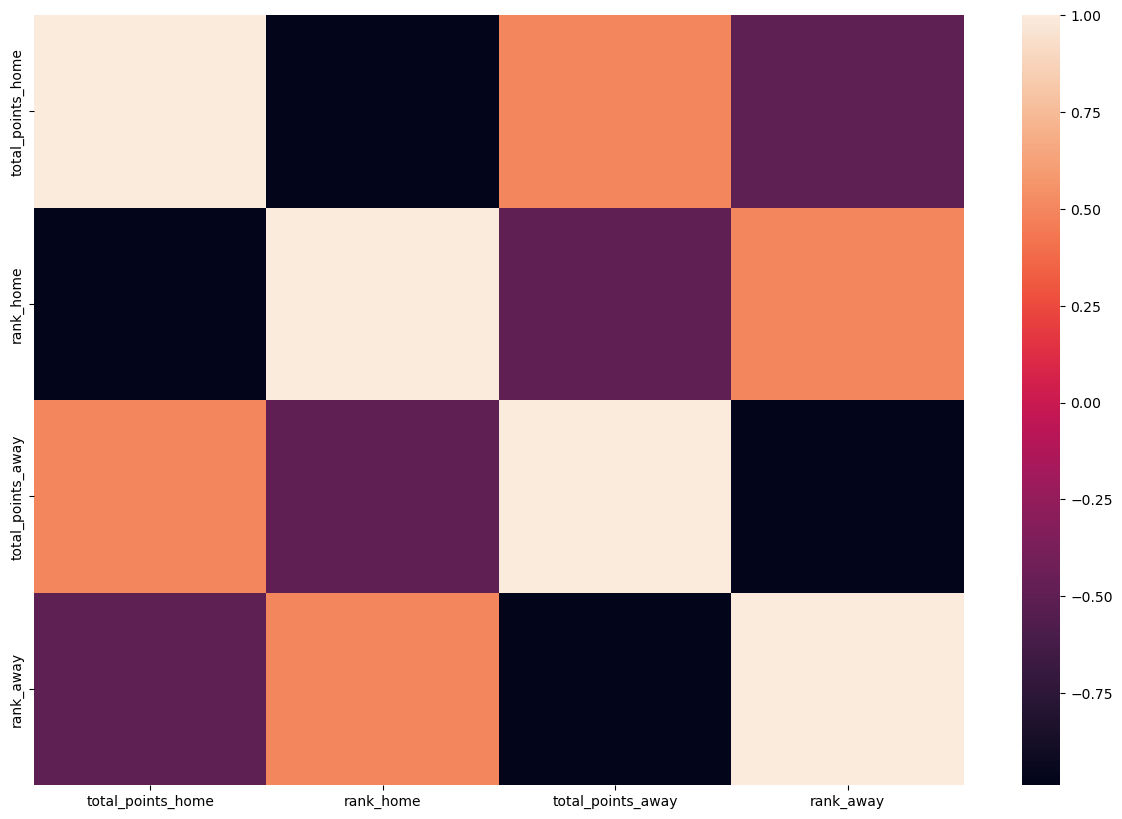

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

In [23]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [24]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [25]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [29]:
team_stats = pd.concat([home_team, away_team]).sort_values("date").reset_index(drop=True)


In [30]:
#this column will be used to calculate features for simulation
team_stats_raw = team_stats.copy()